Использовал Датасеты из https://archive.ics.uci.edu/ml/datasets/wine+quality

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('winequality-white.csv', delimiter=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.shape

(4898, 12)

In [4]:
df.loc[df['quality'] <= 5, 'quality'] = 0

In [5]:
df.loc[df['quality'] >= 6, 'quality'] = 1

In [6]:
df['quality'].value_counts()

1    3258
0    1640
Name: quality, dtype: int64

In [7]:
# первый взгляд на параметр
def first_look(Series1, max_count=0, bins=10, quan=0.999, is_correct_outlier=False, is_show_stat=False):
    Series = Series1.copy()
    # простая корректировка по выбросам
    if is_correct_outlier:
        Series.drop(Series[Series > Series.quantile(quan)].index, inplace=True)
    # расчет основных значений
    Series_mean = round(Series.mean(), 2)
    Series_median = Series.median()
    Series_name = Series.name
    # расчет максимального выброса
    max_count = np.histogram(Series, bins=bins)[0].max()

    plt.figure(figsize=(16, 8))
    Series.hist(bins=bins)
    plt.ylabel('Count')
    plt.xlabel(Series_name)
    # отображение среднего и медианы
    y = np.linspace(0, max_count, bins)
    plt.plot([Series_mean] * bins, y, label='mean  : {:,.2f}'.format(Series_mean), linewidth=4)
    plt.plot([Series_median] * bins, y, label='median: {:,.2f}'.format(Series_median), linewidth=4)
    plt.legend()
    plt.title(Series_name + ' distribution')
    plt.show()
    if is_show_stat:
        print(Series.describe())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

fixed acidity


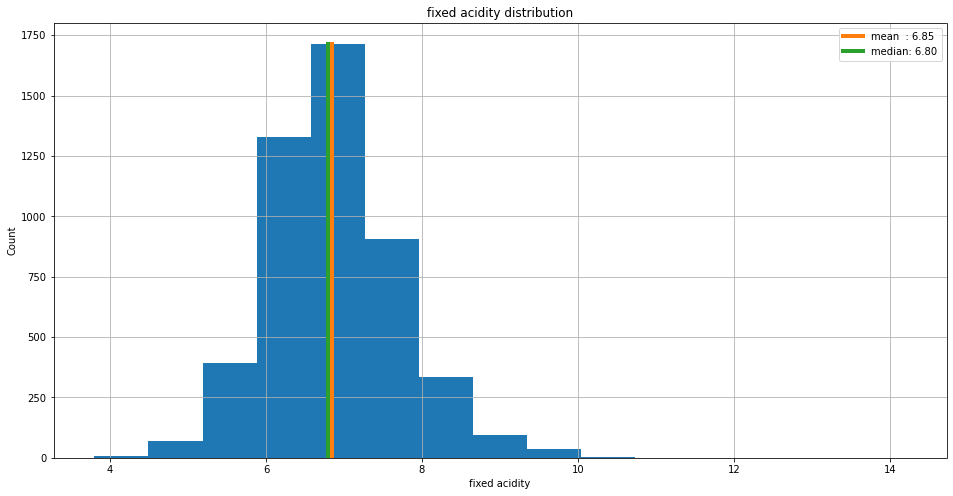

volatile acidity


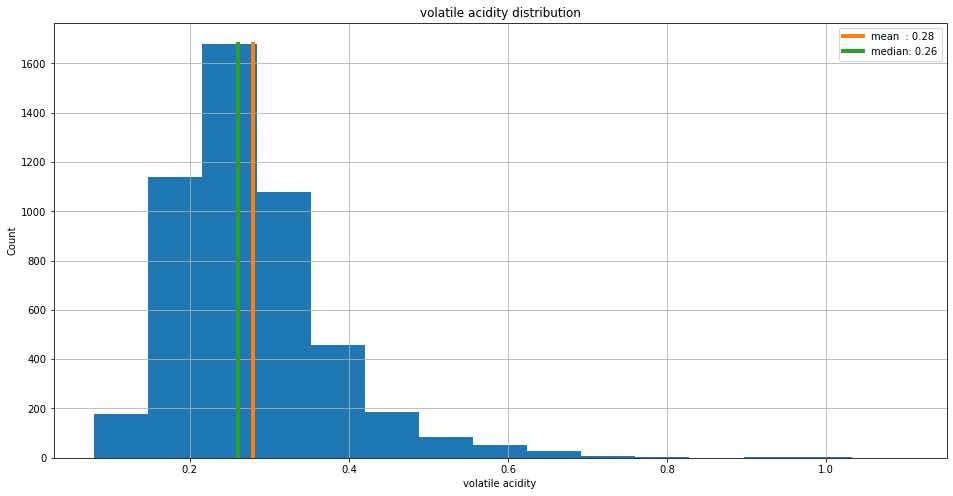

citric acid


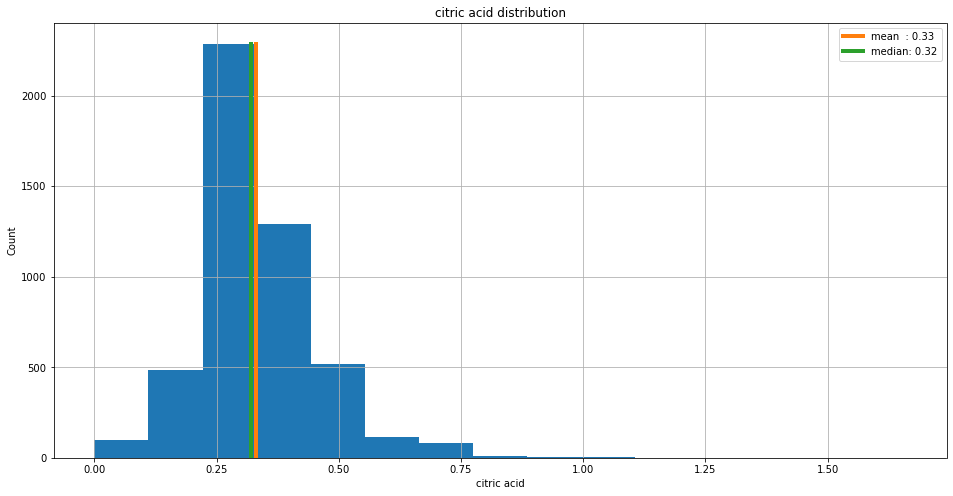

residual sugar


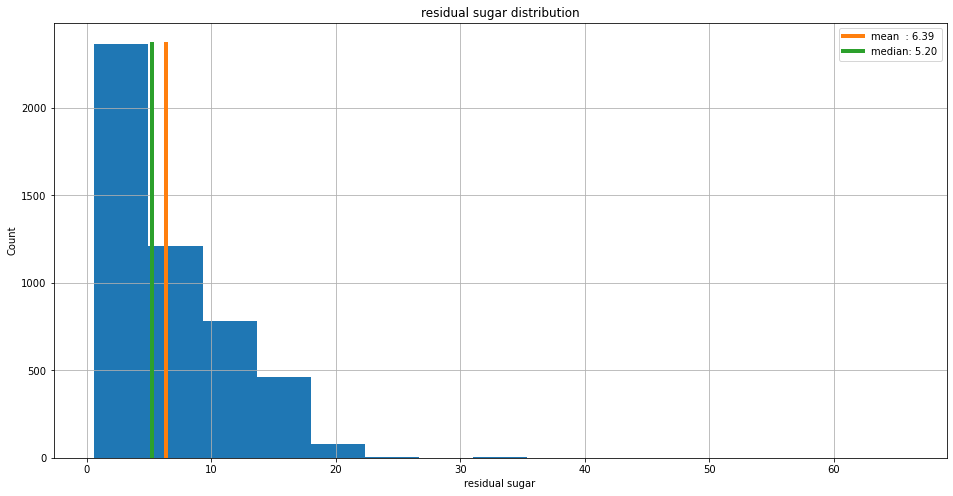

chlorides


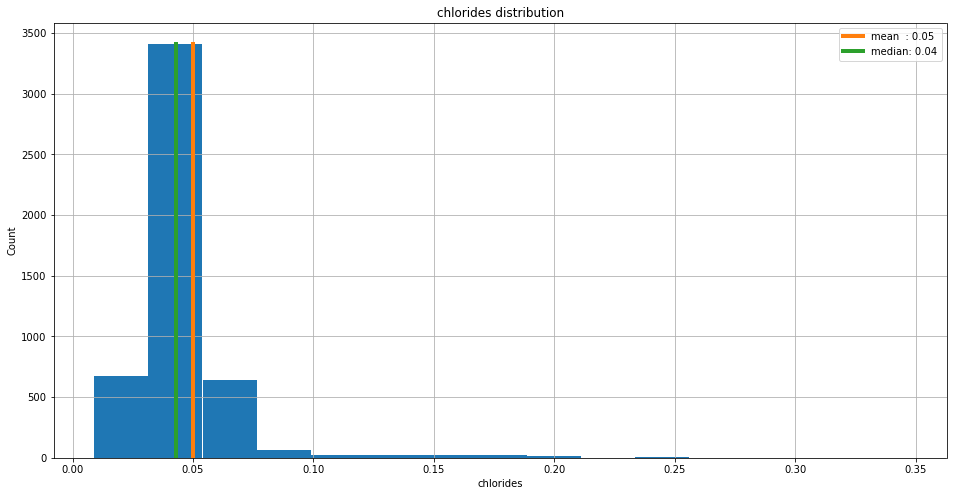

free sulfur dioxide


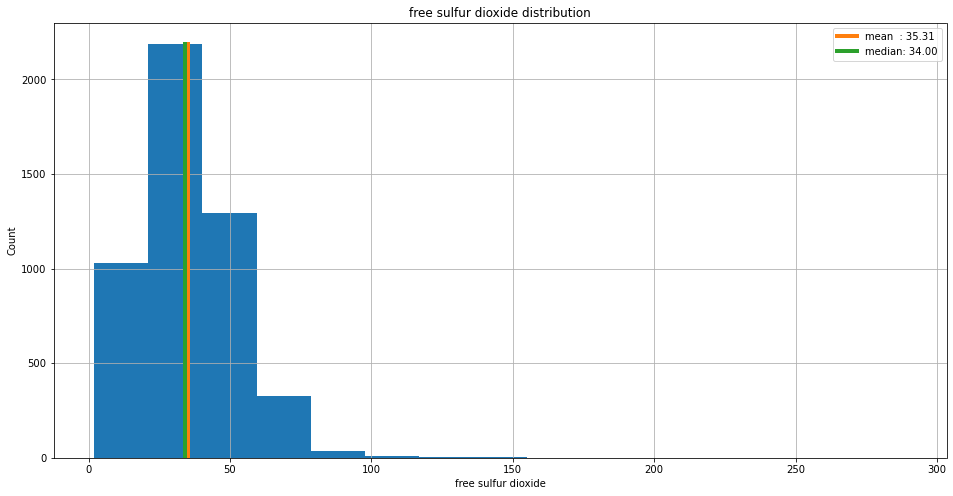

total sulfur dioxide


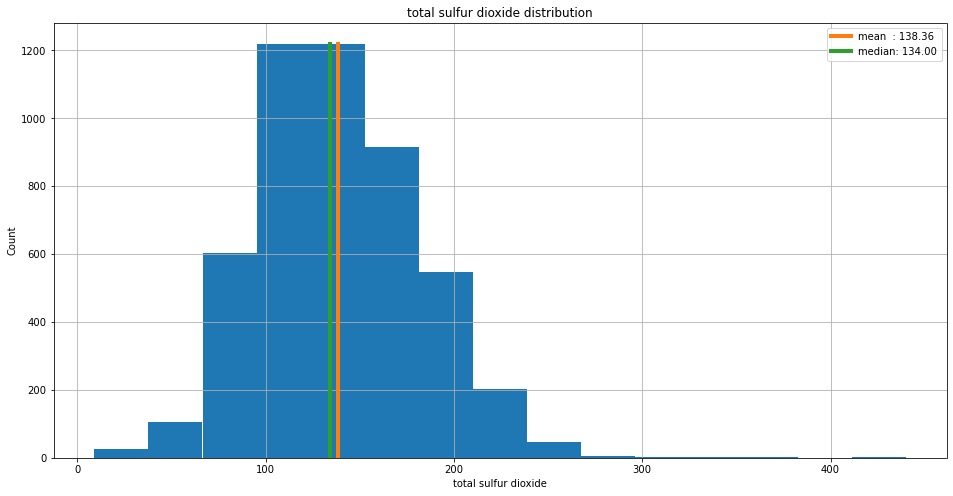

density


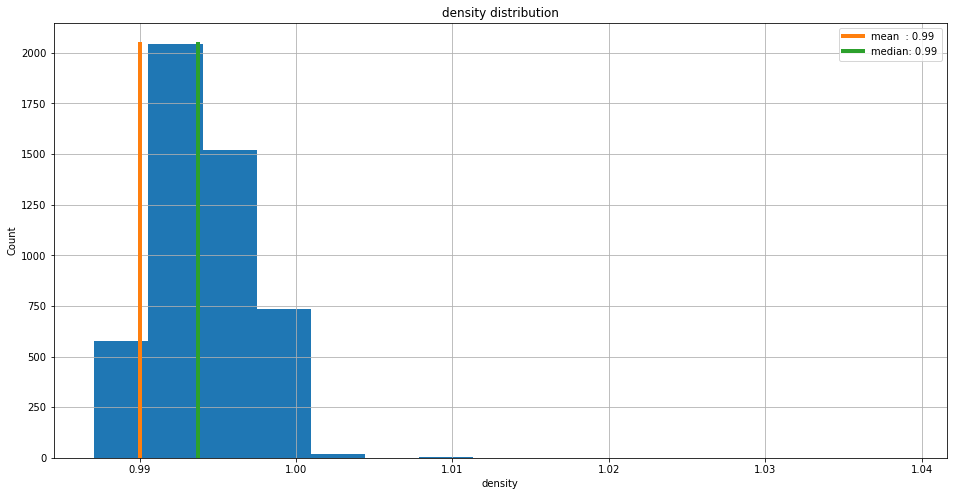

pH


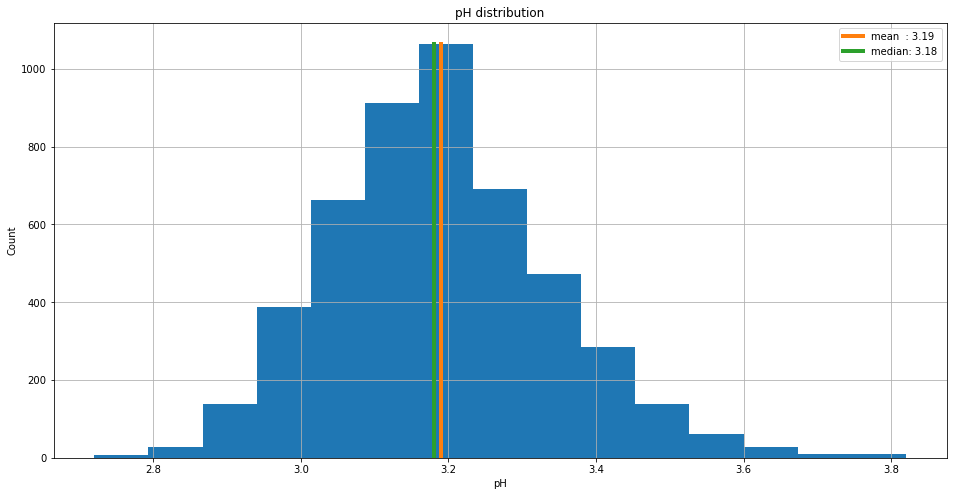

sulphates


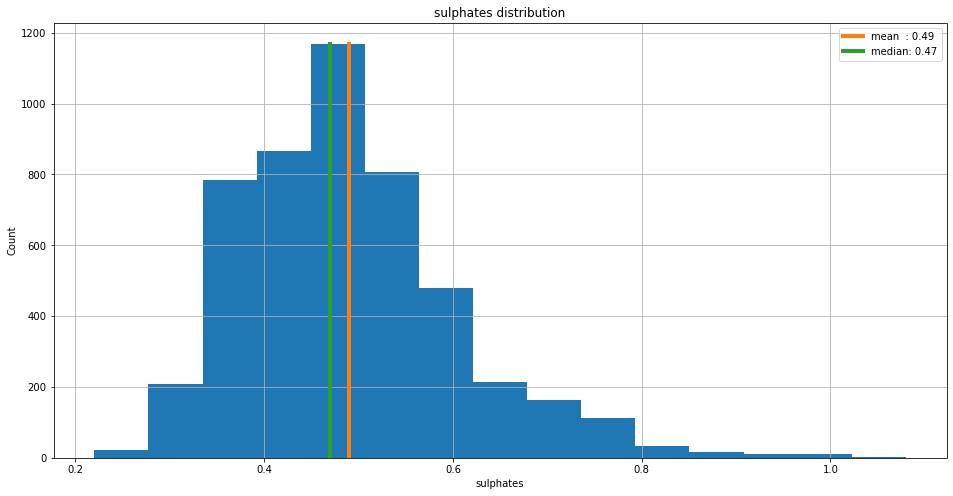

alcohol


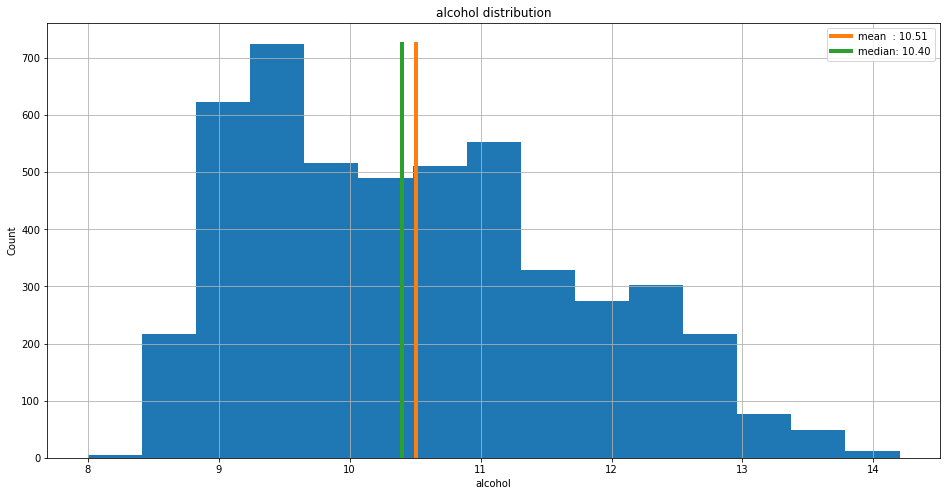

In [10]:
for feature in df.columns[:-1]:
    print(feature)
    first_look(df[feature], bins=15)

In [11]:
from sklearn.model_selection import train_test_split

x_data = df.iloc[:, :-1]
y_data = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [12]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:29:09] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [13]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 

    
evaluate_results(y_test, y_predict)

Classification results:
f1: 87.35%
roc: 80.82%
recall: 87.48%
precision: 87.21%


In [14]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [15]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
import itertools

import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
model = xgboost.train({"learning_rate": 0.01},
                      xgboost.DMatrix(x_train, label=y_train), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

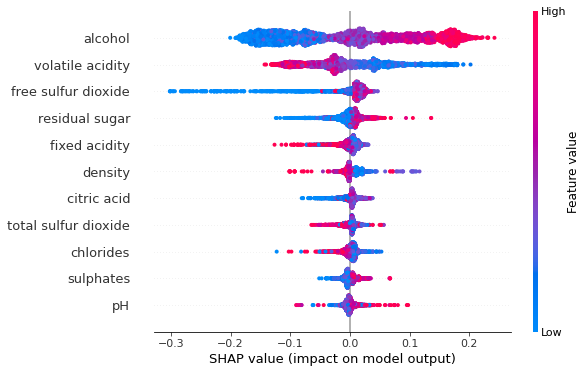

In [17]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_train)

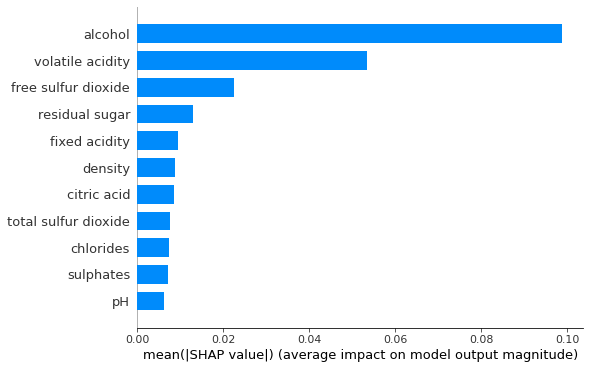

In [18]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

Список признаков по приоритетам 
1) алкоголь - вино с высоким уровнем алкоголя считается более качественным (чем выше , тем лучше)

2) летучая кислотность - формирование букета вина (побочный признак перегонки) (чем ниже, тем лучше)

3) свободный диоксид серы - защищает вино от микробов и бактерий, а также от преждевременного окисления, старения и превращения в уксус, однако крайне негативен в больших количествах (чем меньше и отрицательнее значения, тем лучше)

In [19]:
predict = y_predict
x_test_10 = x_test
dif = np.abs(y_test - predict).reset_index(drop=True)
x_test_10['dif'] = dif
length_10 = round(len(x_test_10) * 0.1)
x_test_10 = x_test_10.sort_values(by=['dif']).iloc[: length_10, :]
x_test_10 = x_test_10.drop('dif', 1)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


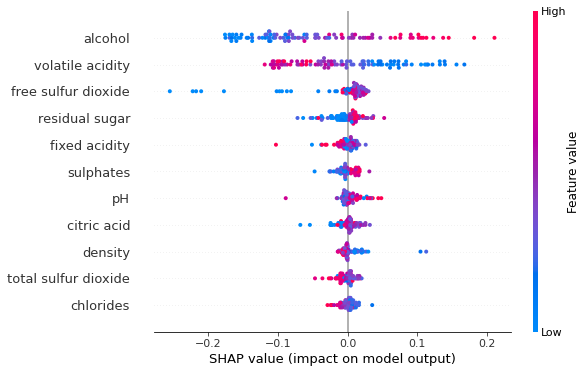

In [20]:
shap_values = explainer.shap_values(x_test_10)
shap.summary_plot(shap_values, x_test_10)

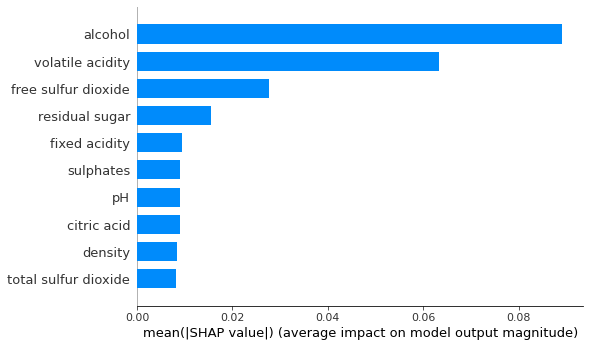

In [21]:
shap.summary_plot(shap_values=shap_values, features=x_test_10, plot_type='bar', max_display=10)

In [22]:
def force_plot(sample_number):
    display(
        pd.DataFrame(df.iloc[sample_number, :]).T,
        shap.force_plot(explainer.expected_value, shap_values[sample_number, :], x_train.iloc[sample_number, :]))

In [23]:
force_plot(sample_number=90)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
90,7.2,0.39,0.63,11.0,0.044,55.0,156.0,0.9974,3.09,0.44,8.7,1.0
